In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import numpy as np
'''
import sys
sys.path.append('Classes')
from arpy import *
'''
import arpa

# processing ngram counts

In [102]:
start = time.time()
file = open('../../2000-2014_ngram_counts.txt','r')

counts = np.zeros(8)

for x in file:
    line = x.split('\t')
    r = line[1].split('\n')
    if (int(r[0]) < 9):
        counts[int(r[0])-1] += 1
        
print('amount of ngrams occuring r times:')
print(counts)
end = time.time()
print('time:' + str(end-start))

[1.03350547e+08 1.83562150e+07 6.96580800e+06 3.71583200e+06
 2.29900700e+06 1.58638800e+06 1.16322500e+06 8.93217000e+05]
175.30552291870117


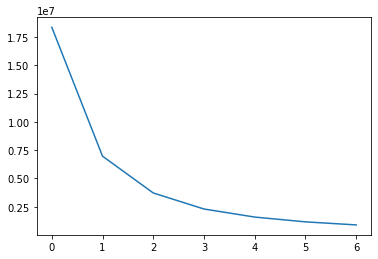

In [124]:
plt.plot(counts[1:10])

In [118]:
start = time.time()
file = open('../../2000-2014_ngram_counts.txt','r')

totals = np.zeros(3)
ngrams = 0

for x in file:
    line = x.split('\t')
    tuple_size = len(line[0].split(' '))

    r = line[1].split('\n')
    totals[tuple_size-1] = totals[tuple_size-1] + int(r[0])

    ngrams += 1

print('sum of ngrams counts:')
print(totals)
print('total unique ngrams:')
print(ngrams)
end = time.time()
print('time: ' + str(end-start))

[4.69470811e+08 4.46265002e+08 4.23059193e+08]
145598918
218.38853883743286


# ..

In [105]:
start = time.time()
file = open('../../GTBO_LM.lm','r')
#file = open('../../lm','r')


total = 0
ngrams = 0

for x in range(5):
    file.readline()

for x in file:
    line = x.split('\t')
    if line[0] != '\n':
        if line[0] != '':
            if line[0][0] != '\\':
                #log = float(line[0])
                #total = total + 10**log
                #print('\ntotal: ' + str(total))
                #print(10**log)
                ngrams+=1
    
print(ngrams)
end = time.time()
print('time: ' + str(end-start))

59700335
31.814959049224854


In [125]:
start = time.time()
file = open('../../count.txt','r')

totals = np.zeros(3)
ngrams = 0

for x in file:
    line = x.split('\t')
    tuple_size = len(line[0].split(' '))
    r = line[-1].split('\n')
    totals[tuple_size-1] = totals[tuple_size-1] + int(r[0])
    ngrams += 1
    
print(totals)
print(ngrams)
end = time.time()
print('time: ' + str(end-start))

[52. 49. 46.]
127
0.45856308937072754


In [2]:
lm = arpa.loadf('../../round1/practiseLM.arpa')
#ABOUT CERTAIN AREAS

# Pgt calculated by srilm

In [69]:
print('Pgt(' + str(lm[0].p("ABOUT CERTAIN AREAS")) + ')')

Pgt(0.021572823983417012)


### get discount factors from srilm output

In [72]:
gtdc = open('../../round1/practise_gt_dc.txt','r')
dc = np.zeros(7)

gtdc.readline()
gtdc.readline()

for x in range(7):
    line = gtdc.readline()
    line = line.split(' ')[2].split('\n')[0]
    dc[x] = float(line)
    
print('discount factor for r = 1, 2, 3, 4, 5, 6, 7')
print(dc)

discount factor for r = 1, 2, 3, 4, 5, 6, 7
[0.258874 0.469898 0.646616 0.697835 0.804042 0.833773 0.844708]


# Prf - calculated by hand

In [67]:
start = time.time()
file = open('../../round1/2000counts.txt','r')

trigram = 0
bigrams = 0

for x in file:
    #line = file.readline()
    #line = line.split('\t')
    line = x.split('\t')
    tuple_size = len(line[0].split(' '))
    
    ngram = line[0]
    r = line[-1].split('\n')[0]

    if ngram == 'ABOUT CERTAIN AREAS':
        trigram = r
    if ngram == 'ABOUT CERTAIN':
        bigram = r
        
    '''
    print(ngram)
    print('tuple size: ' + str(tuple_size))
    print('count: ' + str(r))
    '''

print('trigram count: '+ trigram)
print('bigram count: ' + bigram)
prf = float(trigram)/float(bigram)
print('Prf(' + str(prf) +')')

end = time.time()
print('time: ' + str(end-start))

print('Pgt(' + str(prf*dc[int(trigram)-1]) + ')')

trigram count: 1
bigram count: 12
Prf(0.08333333333333333)
time: 8.368329524993896
Pgt(0.021572833333333333)


# NB! Pgt = discountfactor(r) * Prf

# Find ngrams with r > 7

In [48]:
start = time.time()
file = open('../../round1/2000counts.txt','r')

trigram = 0
bigrams = 0

for x in range(1000):
    line = file.readline()
    line = line.split('\t')
    #line = x.split('\t')
    tuple_size = len(line[0].split(' '))
    
    ngram = line[0]
    r = line[-1].split('\n')[0]

    if tuple_size == 3 and int(r) > 7:
        print(ngram)
        
        
    '''
    print(ngram)
    print('tuple size: ' + str(tuple_size))
    print('count: ' + str(r))
    '''

end = time.time()
print('time: ' + str(end-start))

' S. ZERO
'THIRTY ONE POINT
'ZERO ZERO J.
,EIGHT H. I
,FIVE H. I
,FOUR H. I
,NINE H. I
,ONE H. I
,SEVEN H. I
,SIX H. I
,THREE H. I
,TWO H. I
.BUSINESSDAY .CO .ZA
.CO .ZA </s>
.CO .ZA A
.CO .ZA AND
time: 0.002287626266479492


# AS seen below, for r > Pgt = Prf

In [68]:
print('Pgt(' + str(lm[0].p(".CO .ZA </s>"))+ ')')

Pgt(0.45475637925835855)


In [73]:
start = time.time()
file = open('../../round1/2000counts.txt','r')

trigram = 0
bigrams = 0

for x in file:
    #line = file.readline()
    #line = line.split('\t')
    line = x.split('\t')
    tuple_size = len(line[0].split(' '))
    
    ngram = line[0]
    r = line[-1].split('\n')[0]

    if ngram == '.CO .ZA </s>':
        trigram = r
    if ngram == '.CO .ZA':
        bigram = r
        
    '''
    print(ngram)
    print('tuple size: ' + str(tuple_size))
    print('count: ' + str(r))
    '''

print('trigram count: '+ trigram)
print('bigram count: ' + bigram)
prf = float(trigram)/float(bigram)
print('Prf(' + str(prf) +')')

end = time.time()
print('time: ' + str(end-start))

trigram count: 196
bigram count: 431
Prf(0.4547563805104408)
time: 8.28202486038208
